# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [285]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#플랫폼 패키지는 현재 내 컴퓨터의 os가 무엇인지 코드로 확인하는 패키지
#맥과 윈도우에서 다 사용할 수 있는 코드
#윈도우용 코드만 가져다 써도됨
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    
    import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 

In [251]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이건 코랩에서 사용하기

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## **위의 코드를 실행한 후 재시작**

In [215]:
import pandas as pd

In [216]:
CCTV_Seoul = pd.read_csv('C:/Users/user/DataAnalysis/data_practice/01. CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [217]:
#컬럼확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [218]:
CCTV_Seoul.columns[0]

'기관명'

In [219]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [220]:
# pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul = pd.read_excel('C:/Users/user/DataAnalysis/data_practice/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [221]:
pop_Seoul = pd.read_excel('C:/Users/user/DataAnalysis/data_practice/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N'
                        #   usecols = [1,3,6] 이렇게도 가능
                          )
#컬럼명 '계'가 중복되어 숫자를 자동으로 붙여준다.

#header=2 -> 3번째 행을 컬럼으로 지정하여 불러오기
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [222]:
pop_Seoul.dropna(axis=0,inplace=True)
pop_Seoul.tail()

,자치구,계,계.1,계.2,65세이상고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [223]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
# pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자'] 이렇게 바꾸면 원본에 저장도 되나봄
# pop_Seoul.head()

In [224]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [225]:
import pandas as pd
import numpy as np

In [226]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [227]:
#date_range 시작 날짜를 설정해주면 period만큼 데이터생성
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [228]:
#numpy random모듈 확인하기
#randn -> 표준정규분포에서 난수 생성 
#rand와의 차이점은?
#randint -> 정수생성 

df = pd.DataFrame(np.random.randn(6,4), index=dates,    #6행 4열짜리 난수를 생성
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,1.365227,-0.298686,0.772179,0.303140
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-04,1.314286,-0.154808,1.472468,0.475159
2013-01-05,-1.268681,1.528220,-0.206245,0.953814
2013-01-06,0.782080,-0.016959,-1.768430,-0.284047


In [229]:
df.head()

,A,B,C,D
2013-01-01,1.365227,-0.298686,0.772179,0.303140
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-04,1.314286,-0.154808,1.472468,0.475159
2013-01-05,-1.268681,1.528220,-0.206245,0.953814


In [230]:
df.head(3)

,A,B,C,D
2013-01-01,1.365227,-0.298686,0.772179,0.303140
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871


In [231]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [232]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [233]:
df.values

array([[ 1.36522716, -0.29868562,  0.7721794 ,  0.30313984],
       [-0.17768224,  0.74705355,  0.6422354 ,  0.01243734],
       [ 0.58140545,  1.03614962, -0.58887829, -0.11087087],
       [ 1.31428585, -0.15480785,  1.4724683 ,  0.47515928],
       [-1.26868064,  1.52821969, -0.20624536,  0.95381376],
       [ 0.78207961, -0.01695851, -1.76843045, -0.28404717]])

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [235]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.432773,0.473495,0.053888,0.224939
std,1.005807,0.739653,1.155520,0.450994
min,-1.268681,-0.298686,-1.768430,-0.284047
25%,0.012090,-0.120346,-0.493220,-0.080044
50%,0.681743,0.365048,0.217995,0.157789
75%,1.181234,0.963876,0.739693,0.432154
max,1.365227,1.528220,1.472468,0.953814


In [236]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,-1.268681,1.528220,-0.206245,0.953814
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-06,0.782080,-0.016959,-1.768430,-0.284047
2013-01-04,1.314286,-0.154808,1.472468,0.475159
2013-01-01,1.365227,-0.298686,0.772179,0.303140


In [237]:
#인덱스정렬
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.782080,-0.016959,-1.768430,-0.284047
2013-01-05,-1.268681,1.528220,-0.206245,0.953814
2013-01-04,1.314286,-0.154808,1.472468,0.475159
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-01,1.365227,-0.298686,0.772179,0.303140


In [238]:
df

,A,B,C,D
2013-01-01,1.365227,-0.298686,0.772179,0.303140
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-04,1.314286,-0.154808,1.472468,0.475159
2013-01-05,-1.268681,1.528220,-0.206245,0.953814
2013-01-06,0.782080,-0.016959,-1.768430,-0.284047


In [239]:
#결과값의 타입은 시리즈
df['A']

2013-01-01    1.365227
2013-01-02   -0.177682
2013-01-03    0.581405
2013-01-04    1.314286
2013-01-05   -1.268681
2013-01-06    0.782080
Freq: D, Name: A, dtype: float64

In [240]:
df[0:3]

,A,B,C,D
2013-01-01,1.365227,-0.298686,0.772179,0.303140
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871


In [241]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.177682,0.747054,0.642235,0.012437
2013-01-03,0.581405,1.036150,-0.588878,-0.110871
2013-01-04,1.314286,-0.154808,1.472468,0.475159


In [242]:
type(df.loc[dates[0]])

pandas.core.series.Series

In [243]:
type(df.loc[:,['A','B']])

pandas.core.frame.DataFrame

In [244]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.177682,0.747054
2013-01-03,0.581405,1.036150
2013-01-04,1.314286,-0.154808


In [245]:

type(df.loc['20130102',['A','B']])
# df.loc['20130102','A':'B']

pandas.core.series.Series

In [246]:
type(df.loc[dates[0],'A'])

numpy.float64

In [247]:
df.iloc[3]

A    1.314286
B   -0.154808
C    1.472468
D    0.475159
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.276879,0.163761
2013-01-05,0.448486,-0.442263


In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.066098,-0.412700
2013-01-03,-0.899768,0.287994
2013-01-05,0.448486,-0.299058


In [35]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.066098,-0.992334,-0.412700,0.111317
2013-01-03,-0.899768,-0.667389,0.287994,0.436572


In [36]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.721902,1.504338
2013-01-02,-0.992334,-0.412700
2013-01-03,-0.667389,0.287994
2013-01-04,0.163761,-0.181982
2013-01-05,-0.442263,-0.299058
2013-01-06,1.018646,0.061224


In [61]:
df

,A,B,C,D
2013-01-01,1.602046,-0.138091,-0.921588,-0.059090
2013-01-02,-1.310088,0.324423,2.122604,-0.057901
2013-01-03,-1.845890,0.625450,-0.902516,-0.383479
2013-01-04,-1.904116,0.597525,-0.919010,1.105821
2013-01-05,0.657721,-0.355859,-0.645130,-0.089512
2013-01-06,0.154444,0.872163,-0.583441,0.194067


In [62]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.602046,-0.138091,-0.921588,-0.059090
2013-01-05,0.657721,-0.355859,-0.645130,-0.089512
2013-01-06,0.154444,0.872163,-0.583441,0.194067


In [66]:
df_nan = df[df > 0]
#결측치가 3개 이상인 행은 삭제 
df_nan.dropna(thresh = len(df_nan.columns) - 2)

,A,B,C,D
2013-01-02,NaN,0.324423,2.122604,NaN
2013-01-04,NaN,0.597525,NaN,1.105821
2013-01-06,0.154444,0.872163,NaN,0.194067


In [67]:
df2 = df.copy()

In [68]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,1.602046,-0.138091,-0.921588,-0.059090,one
2013-01-02,-1.310088,0.324423,2.122604,-0.057901,one
2013-01-03,-1.845890,0.625450,-0.902516,-0.383479,two
2013-01-04,-1.904116,0.597525,-0.919010,1.105821,three
2013-01-05,0.657721,-0.355859,-0.645130,-0.089512,four
2013-01-06,0.154444,0.872163,-0.583441,0.194067,three


In [69]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [70]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.845890,0.625450,-0.902516,-0.383479,two
2013-01-05,0.657721,-0.355859,-0.645130,-0.089512,four


In [74]:
df

,A,B,C,D
2013-01-01,1.602046,-0.138091,-0.921588,-0.059090
2013-01-02,-1.310088,0.324423,2.122604,-0.057901
2013-01-03,-1.845890,0.625450,-0.902516,-0.383479
2013-01-04,-1.904116,0.597525,-0.919010,1.105821
2013-01-05,0.657721,-0.355859,-0.645130,-0.089512
2013-01-06,0.154444,0.872163,-0.583441,0.194067


In [76]:
# df.apply(np.cumsum)
df.cumsum()

,A,B,C,D
2013-01-01,1.602046,-0.138091,-0.921588,-0.059090
2013-01-02,0.291958,0.186332,1.201016,-0.116991
2013-01-03,-1.553932,0.811782,0.298500,-0.500470
2013-01-04,-3.458048,1.409307,-0.620510,0.605351
2013-01-05,-2.800327,1.053449,-1.265640,0.515839
2013-01-06,-2.645883,1.925612,-1.849081,0.709905


In [78]:
func = lambda x: x.max() - x.min()

In [80]:
# df.apply(lambda x: x.max() - x.min())
df.apply(func)

#apply함수는 기본적으로 열을 기준으로 동작(열방향)
#행방향(열끼리 더하기)은 axis = 1

A    3.506163
B    1.228022
C    3.044191
D    1.489300
dtype: float64

# 4. CCTV 데이터 파악하기

In [82]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [85]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [49]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [50]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [86]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [87]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [88]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [98]:
pop_Seoul['구별'].unique()
# num = pop_Seoul['구별'].nunique()     #nan값은 빼고 숫자를 반환한다.
# num

len(pop_Seoul.index)

25

In [99]:
pop_Seoul[pop_Seoul['구별'].isnull()]
temp = pop_Seoul[pop_Seoul['구별'].isnull()].index

In [100]:
pop_Seoul.drop(temp, inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [56]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [57]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [58]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [59]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [60]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [61]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [101]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [102]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [103]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [104]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [105]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [111]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
#keys -> 멀티인덱스
result
result.loc['z']
# result.loc[('z',8)]   #멀티인덱스 출력

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [68]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [112]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [70]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [71]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [72]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [73]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [74]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [75]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [76]:
result = pd.concat([df1, df4], axis=1, join='inner')
#inner는 nan값이 없는 행만 합하기를 실행
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [77]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [78]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [79]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [80]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [81]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [82]:
pd.merge(left, right, on='key')
#how 디폴트값은 inner

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [83]:
pd.merge(left, right, how='left', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [84]:
pd.merge(left, right, how='right', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [85]:
pd.merge(left, right, how='outer', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [86]:
pd.merge(left, right, how='inner', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [115]:
pop_Seoul.nunique(),CCTV_Seoul.nunique()

(구별     25
 인구수    25
 한국인    25
 외국인    25
 고령자    25
 dtype: int64,
 구별           25
 소계           25
 2013년도 이전    25
 2014년        24
 2015년        24
 2016년        23
 dtype: int64)

In [113]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0


In [116]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0


In [117]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,인구수,한국인,외국인,고령자
구별,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0
강동구,773,453233.0,449019.0,4214.0,54622.0
강북구,748,330192.0,326686.0,3506.0,54813.0
강서구,884,603772.0,597248.0,6524.0,72548.0
관악구,1496,525515.0,507203.0,18312.0,68082.0


In [90]:
#고령자비율과 cctv 소계와 어떤 상관관계가 있는지 확인
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [91]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [92]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [93]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [94]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Axes: xlabel='구별'>

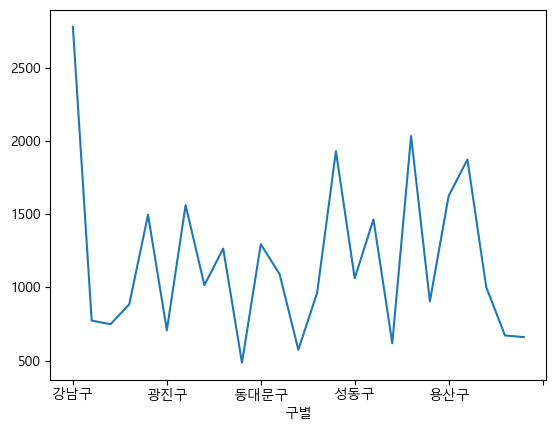

In [122]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  # Windows
data_result['소계'].plot(kind='line')

# 8. 그래프 그리기 기초 - matplotlib

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

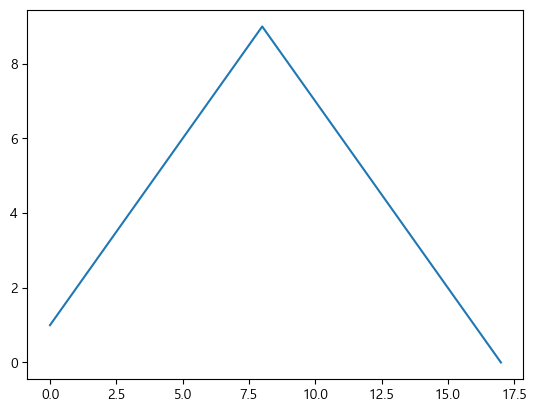

In [123]:
#빈 캔버스 생성
plt.figure()
#그래프를 그린다.
# y값만 입력
# plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])

# x = [0,1,2,3,4,5,6,7,8,9,,10,11,12,13,14,15,16,17]
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0]
plt.plot(y)
plt.show()

In [279]:
import numpy as np

#총 1200개의 데이터 생성
t = np.arange(0,12,0.1)
# t = np.arange(0,12,0.5)

#부드러운 곡선의 그래프를 원할때는 step을 작게해서 데이터를 촘촘하게!

y = np.sin(t)

In [277]:
print(len(t))
print(len(y))

10
7


In [ ]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

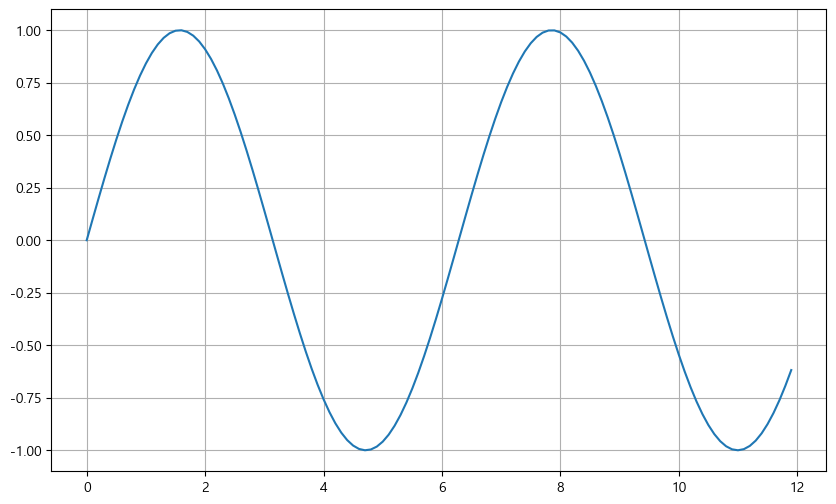

In [287]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
#그리드 : 모눈종이처럼 눈금그리기
plt.grid() # 그리드 적용하기
plt.show()

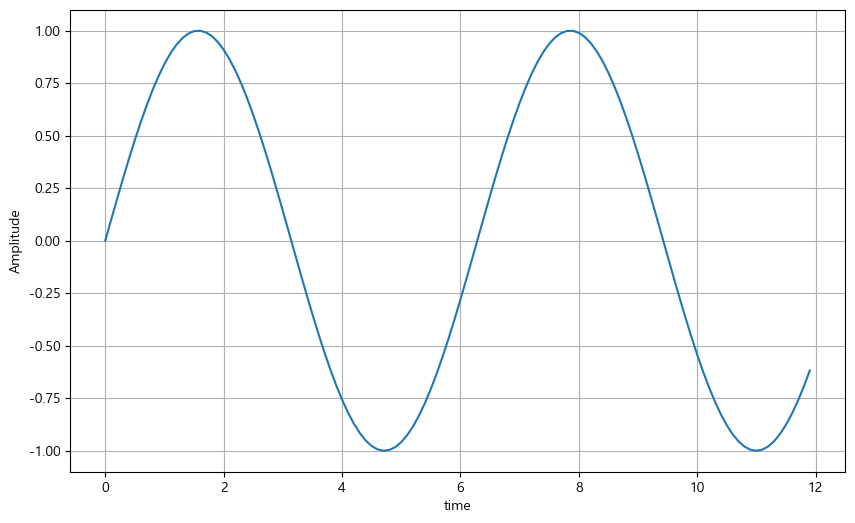

In [286]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

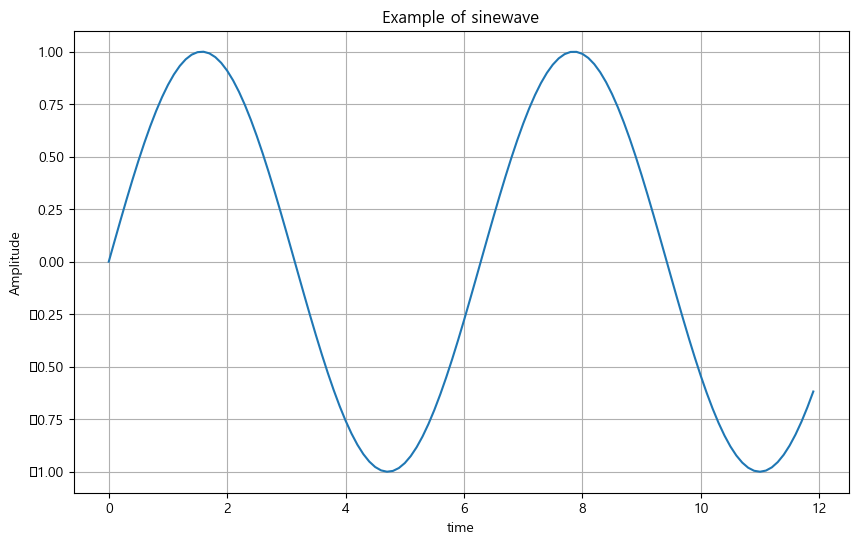

In [137]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

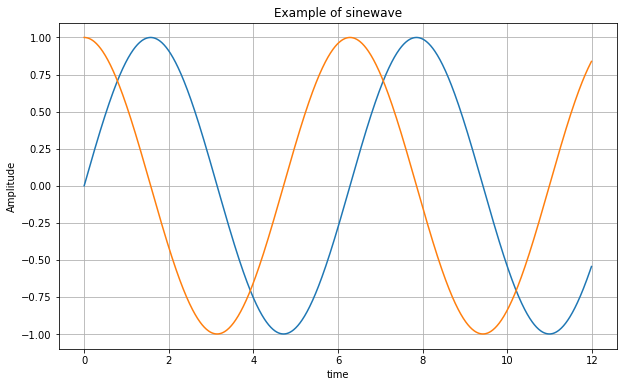

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

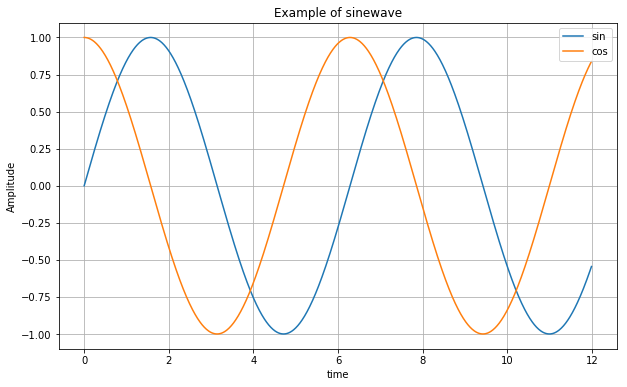

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


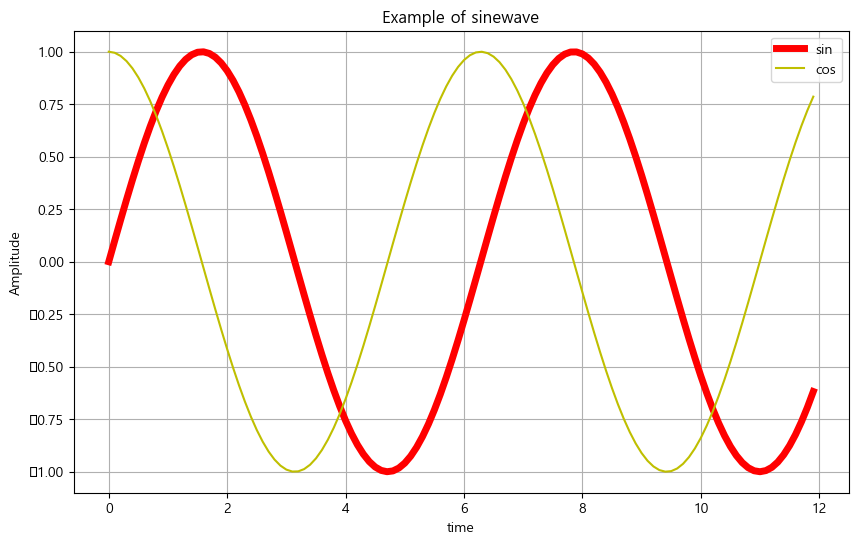

In [142]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), 'r', lw=5,label='sin')   #선굵기 변경
plt.plot(t, np.cos(t), 'y', label='cos')    #색상 변경
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

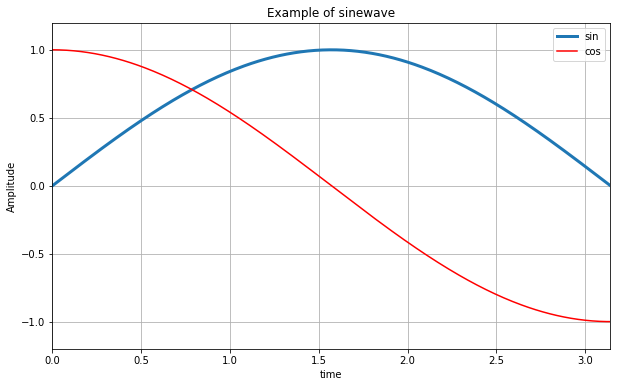

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

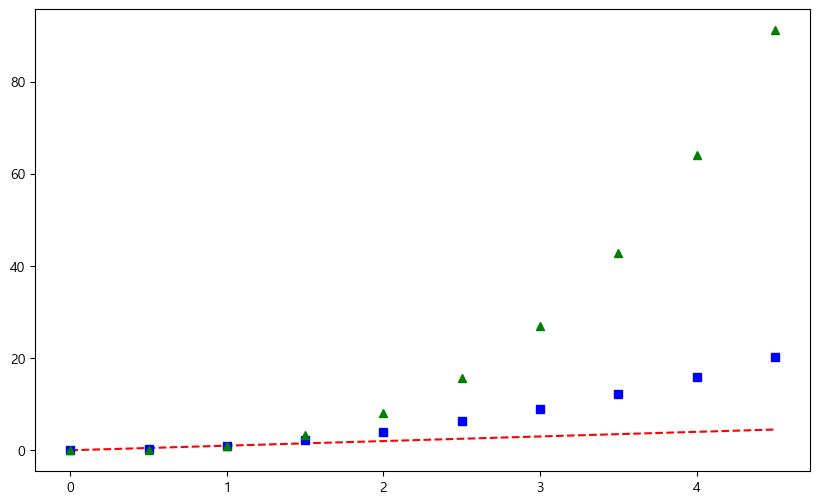

In [151]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

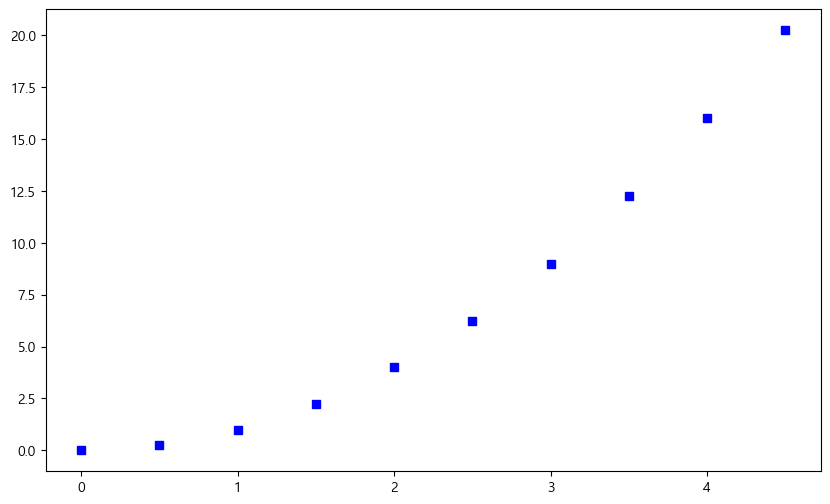

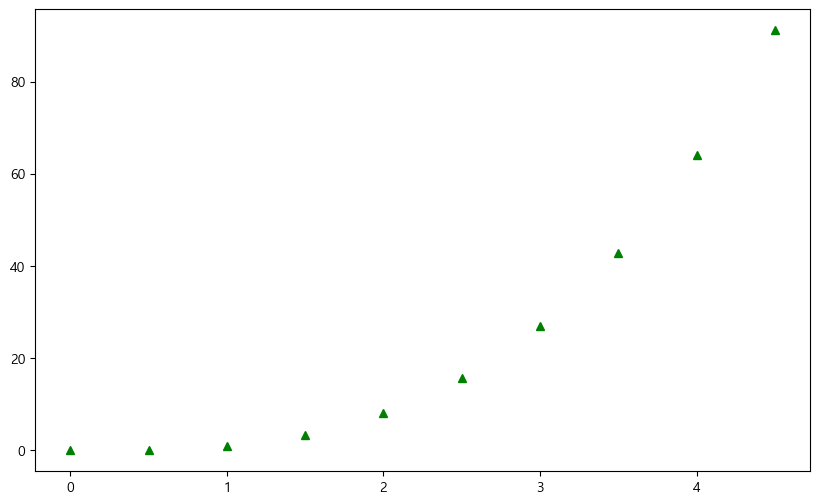

In [255]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))

#기본마커가 연결되게 되어 있어서 보통 선이다
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

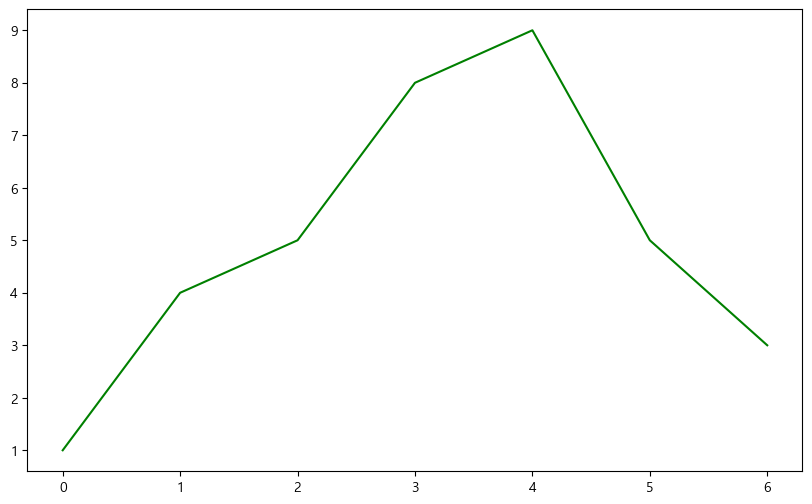

In [254]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

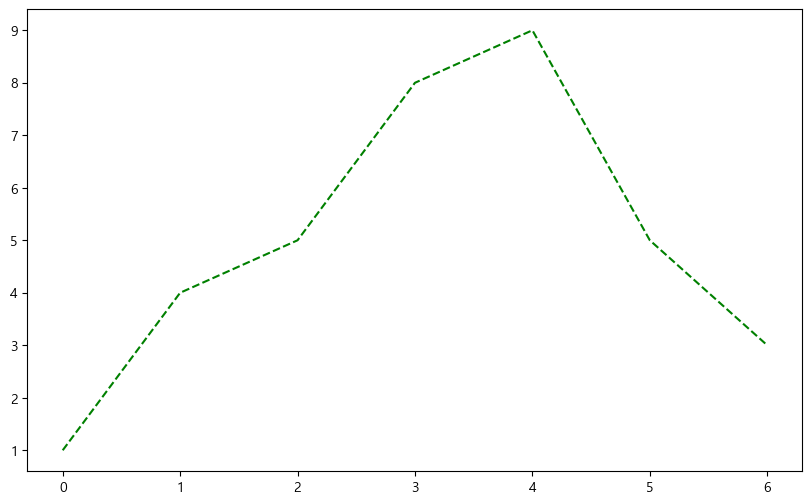

In [154]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

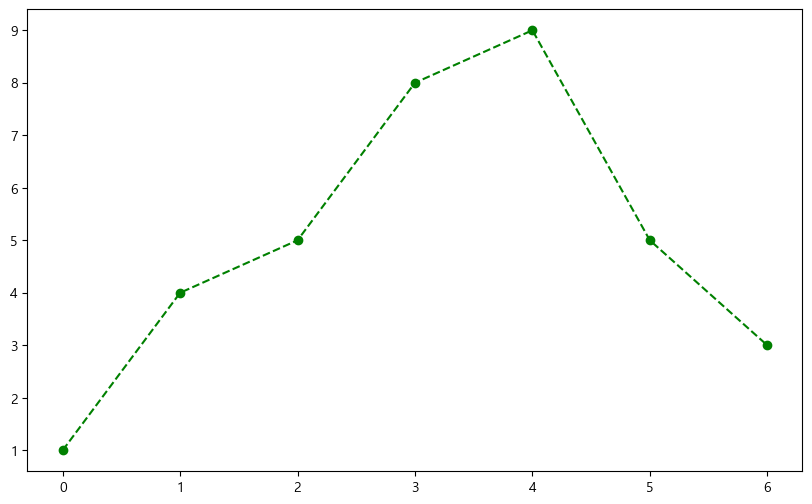

In [155]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

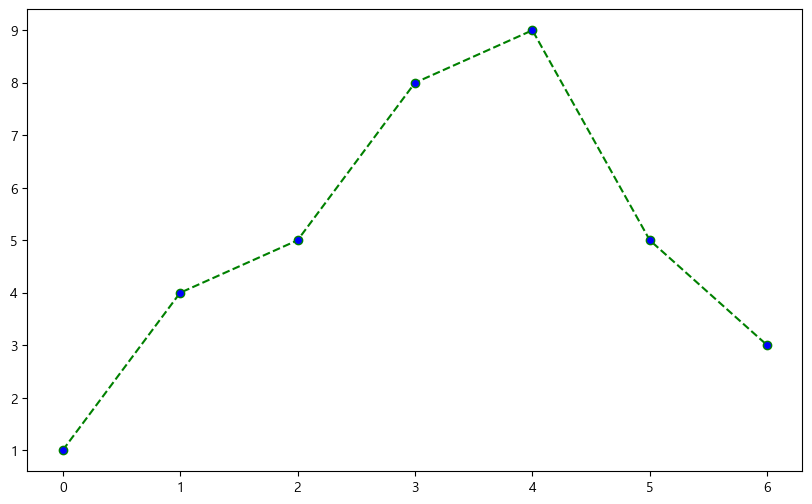

In [156]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

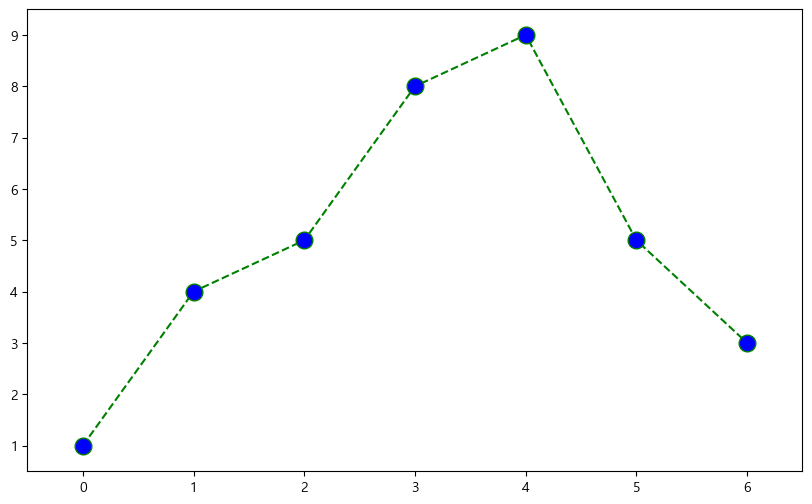

In [157]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [113]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

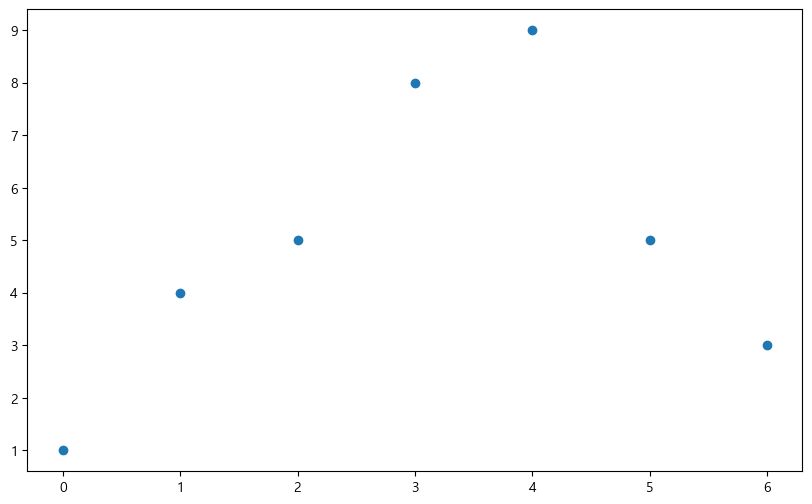

In [158]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

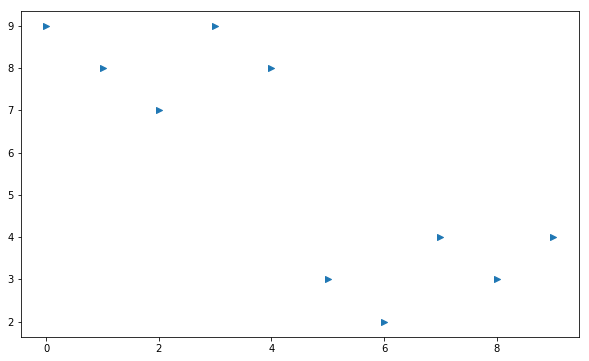

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

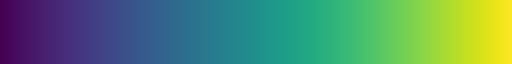

In [161]:
plt.get_cmap()

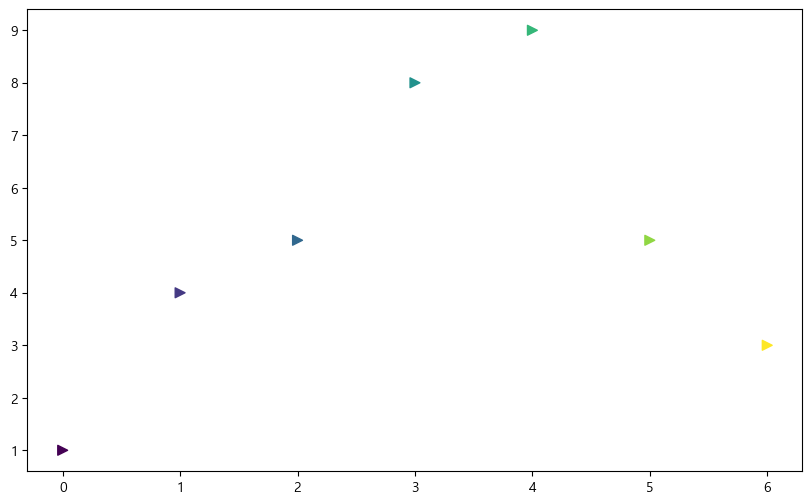

In [159]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

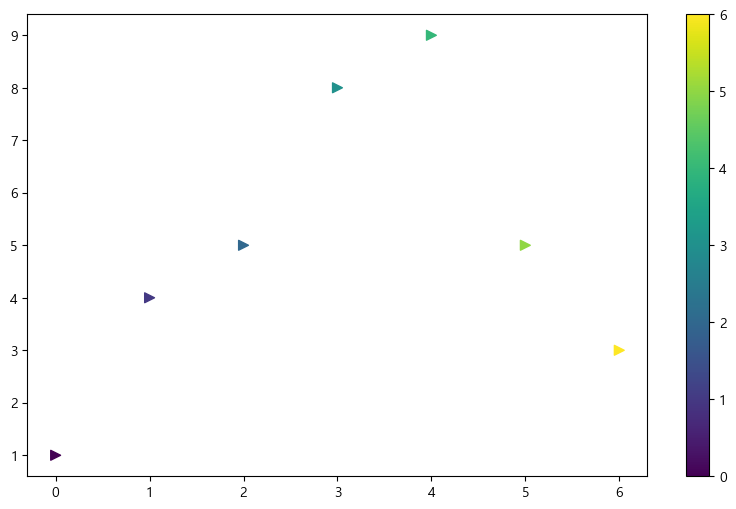

In [160]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [162]:
#정규분포 데이터 생성 
#np.random.normal

#loc - 평균 scale - 편차 
#평균이 0 , -1~1 사이의 숫자 1000개
s1 = np.random.normal(loc=0, scale=1, size=1000)
#평균이5 4,5~5.5사이의 숫자 1000개
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
#평균이 10 8~12사이의 숫자 1000개
s3 = np.random.normal(loc=10, scale=2, size=1000)

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


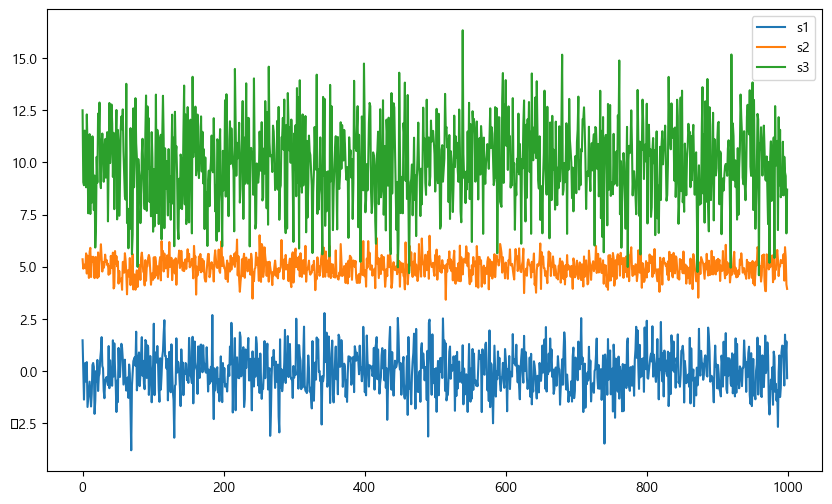

In [163]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


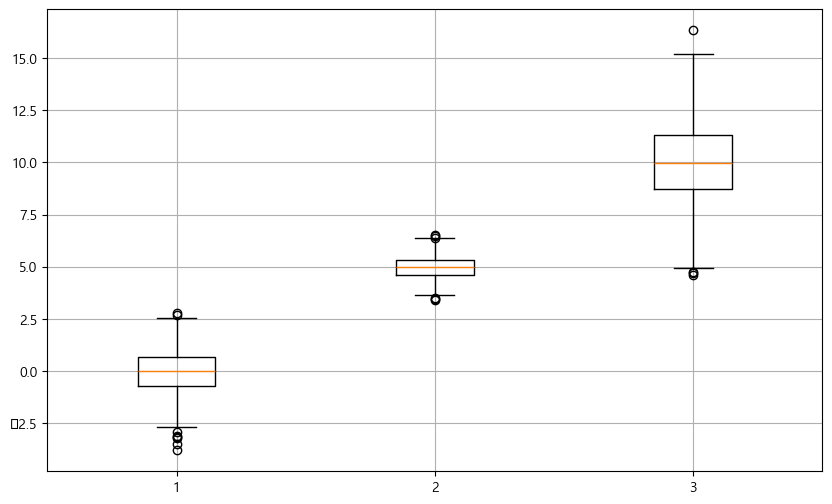

In [164]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()


# 박스플롯에서 이상치는 보통 상자(사분위 범위) 위나 아래에 위치하는 개별 점으로 표시

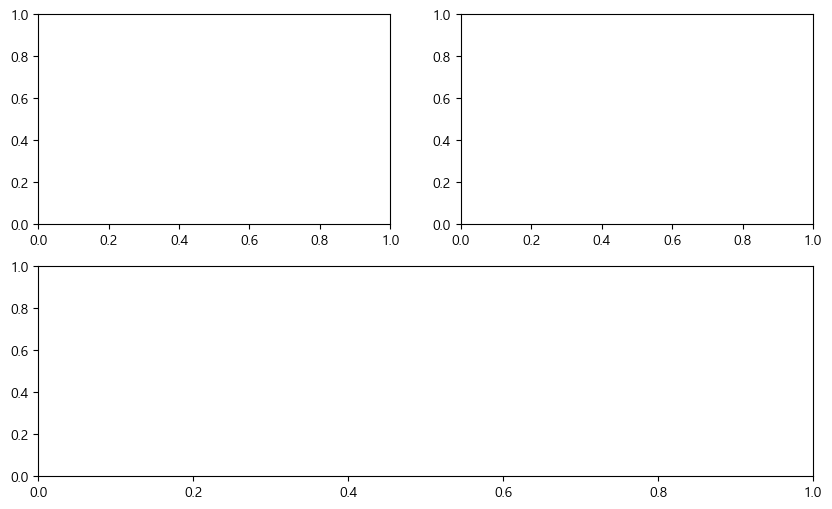

In [188]:
plt.figure(figsize=(10,6))

#그래프 캔버스 쪼개기! subplot
plt.subplot(221)    #2행2열의 첫번째
plt.subplot(222)    #2행2열의 두번째
plt.subplot(212)    #2행1열의 두번째


# plt.subplot(행,열,몇번째)
plt.show()

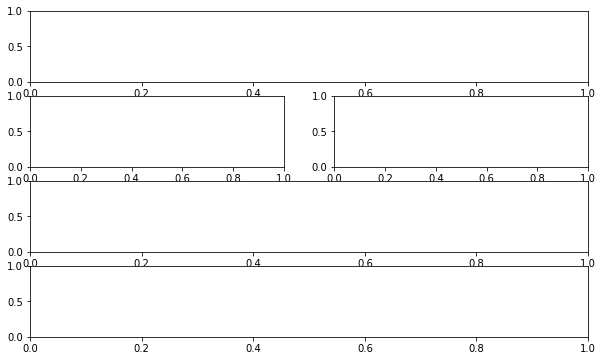

In [122]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

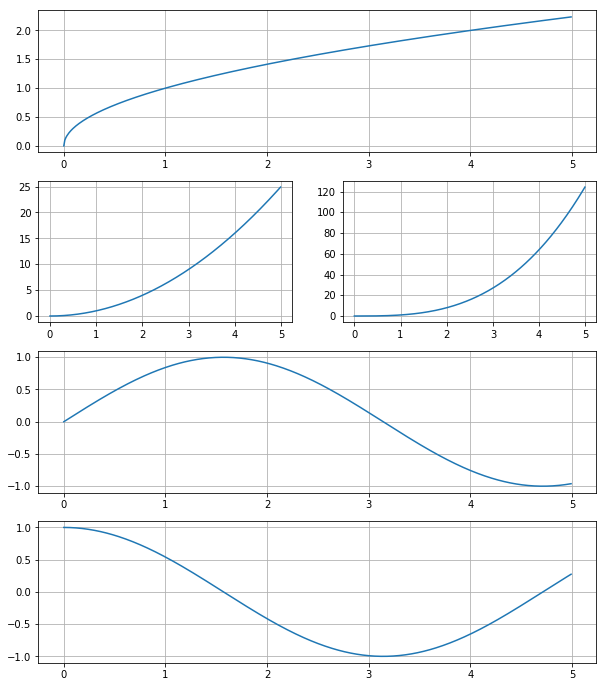

In [123]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [260]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#플랫폼 패키지는 현재 내 컴퓨터의 os가 무엇인지 코드로 확인하는 패키지
#맥과 윈도우에서 다 사용할 수 있는 코드
#윈도우용 코드만 가져다 써도됨
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    
    import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 


In [275]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 




In [208]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292
강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552
강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535
강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413
관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673


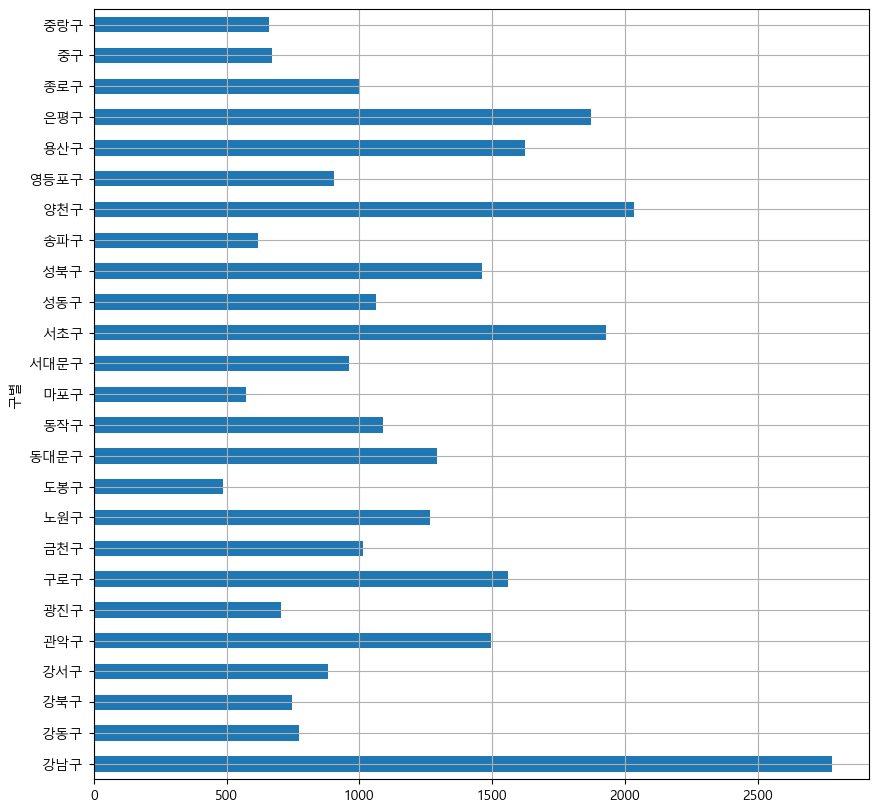

In [197]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

구별
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: 소계, dtype: int64


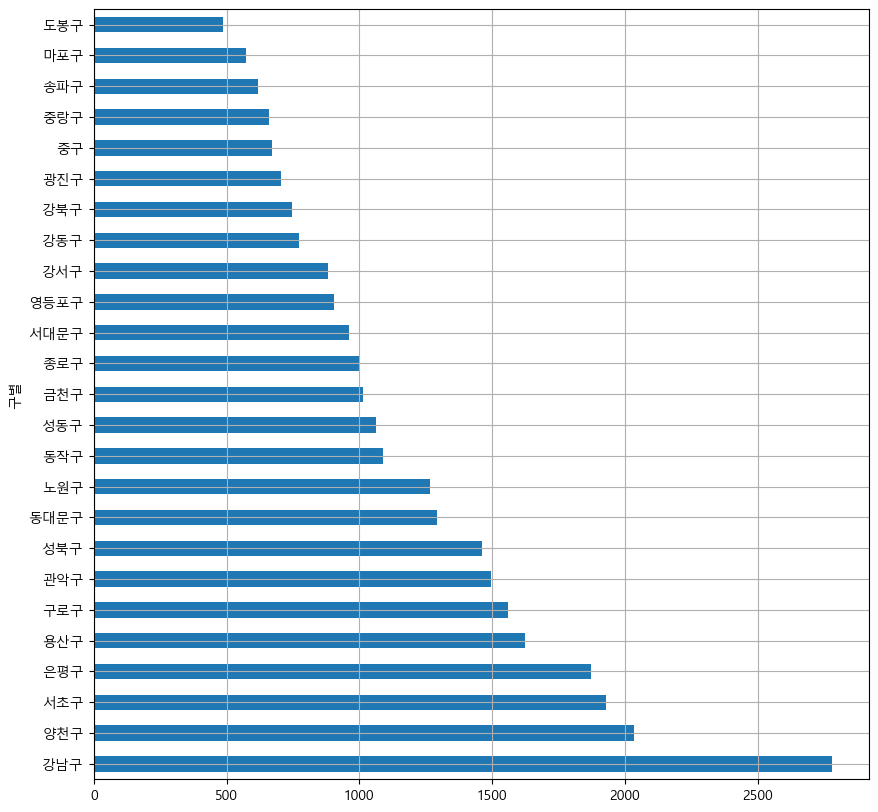

In [266]:
print(data_result['소계'].sort_values(ascending=False))
data_result['소계'].sort_values(ascending=False).plot(kind='barh', 
                                     grid=True, figsize=(10,10))

#데이터 -> 정렬 -> 그래프그리기 순서대로
plt.show()

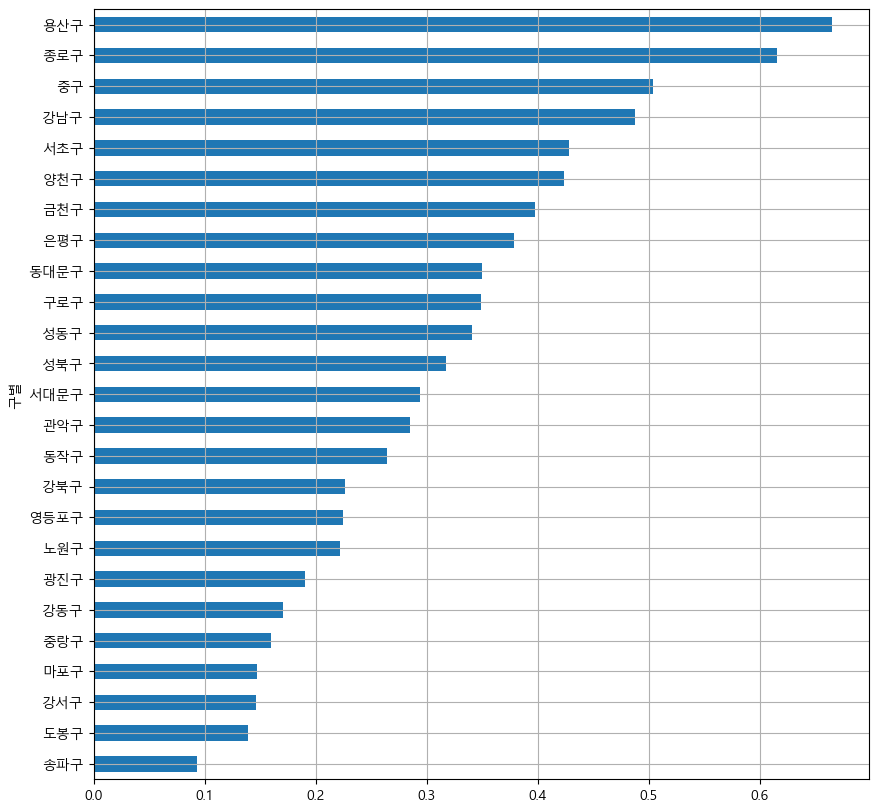

In [193]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

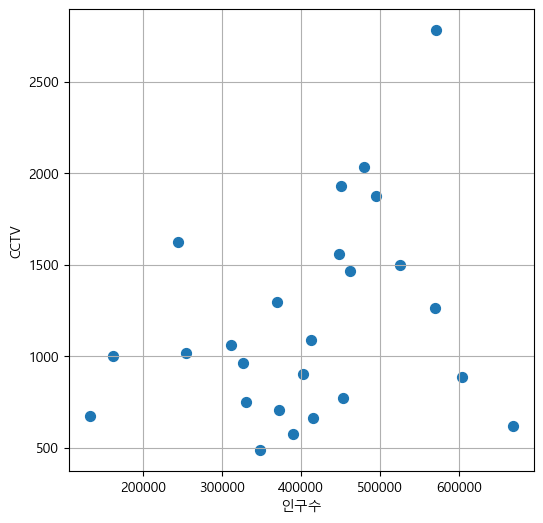

In [269]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [130]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [131]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

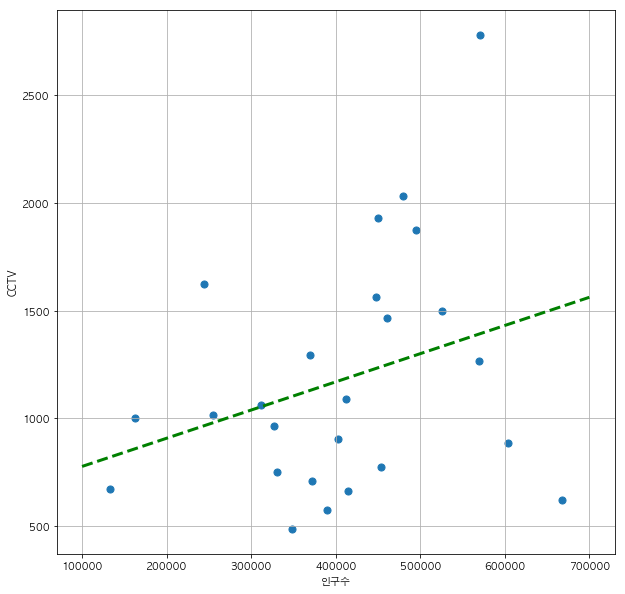

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [289]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=True)
df_sort.head()

,소계,인구수,한국인,외국인,고령자,CCTV비율,오차
구별,,,,,,,
성동구,1062,311244.0,303380.0,7864.0,39997.0,0.341211,9.464016
금천구,1015,255082.0,236353.0,18729.0,32970.0,0.397911,35.989293
동작구,1091,412520.0,400456.0,12064.0,56013.0,0.264472,94.122892
서대문구,962,327163.0,314982.0,12181.0,48161.0,0.294043,111.376568
노원구,1265,569384.0,565565.0,3819.0,71941.0,0.222170,125.483618


C:\Users\user\AppData\Local\Temp\ipykernel_26080\1113668377.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,


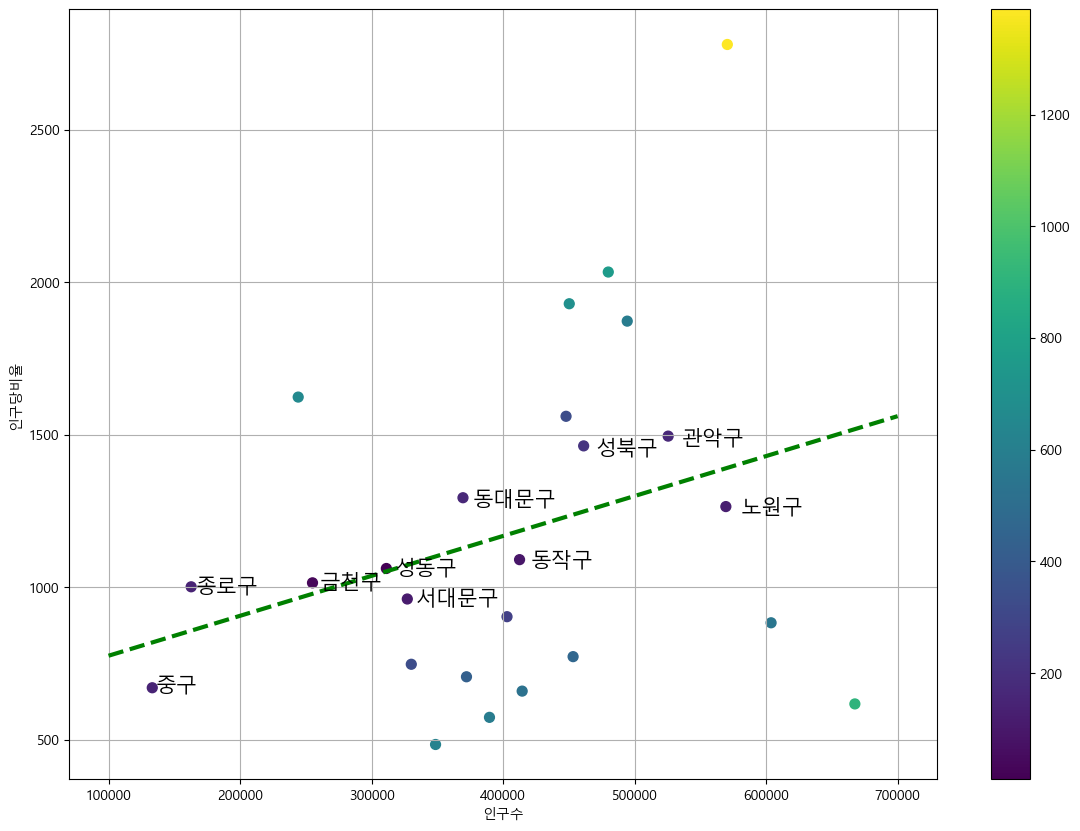

In [290]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다